In [166]:
from ipywidgets import *
from ipywidgets.widgets import IntSlider, FloatSlider
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy.optimize import root

%matplotlib widget

interactive(children=(FloatSlider(value=1.0, description='L1', max=2.0, min=1.0, step=0.01), FloatSlider(value…

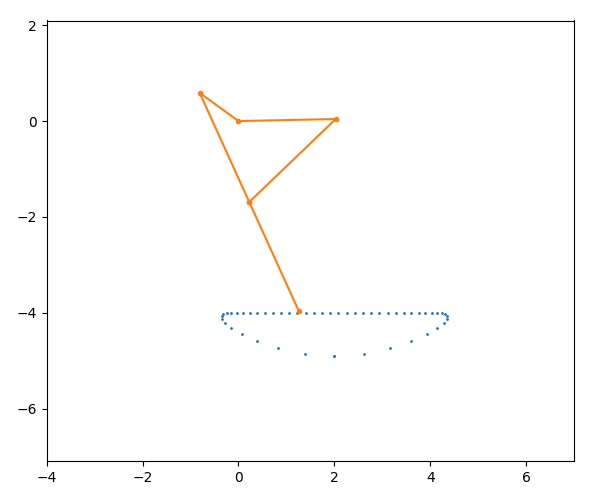

In [291]:
def get_path(dims, npts, guess=np.array([-0.8128368,0.58249149, 0.78720871, 0.61668667])):
    theta1_range = np.linspace(0, 2*pi, npts)
    path = []
    sols = []
    # guess = 


    L1, L2, L3, L4, L5, theta5 = dims
    sin5 = sin(theta5)
    cos5 = cos(theta5)

    for theta1 in theta1_range:
        sin1 = sin(theta1)
        cos1 = cos(theta1) 
        def func_sincos(vars):
            sin2, cos2, sin3, cos3 = vars
            return [
                L1*sin1 + L2*sin2 + L3*sin3,
                L1*cos1 + L2*cos2 + L3*cos3 - L4, 
                sin2**2 + cos2**2 - 1,
                sin3**2 + cos3**2 - 1,        
            ]
        def jac_sincos(vars):
            sin2, cos2, sin3, cos3 = vars
            return [
                [L2, 0, L3, 0],
                [0, L2, 0, L3],
                [2*sin2, 2*cos2, 0, 0],
                [0, 0, 2*sin3, 2*cos3]
            ]
        
        sol = root(func_sincos, jac=jac_sincos, x0=guess, method='hybr').x
        sin2, cos2, sin3, cos3 = sol
        guess = sol

        p5 = L1*np.array([cos1, sin1]) + L2*np.array([cos2, sin2]) + L5*np.array([cos2*cos5-sin2*sin5, sin2*cos5+cos2*sin5])

        path.append(p5)
        sols.append(sol)

    return np.array(path), sols

def get_links(dims, sols, theta1_vis=0):
    L1, L2, L3, L4, L5, theta5 = dims
    sin1, cos1 = (sin(2*pi*theta1_vis/npts), cos(2*pi*theta1_vis/npts))
    sin5, cos5 = (sin(theta5), cos(theta5))
    sin2, cos2, sin3, cos3 = sols[theta1_vis]

    p0 = np.array([0, 0])
    p1 = p0 + L1*np.array([cos1, sin1])
    p2 = p1 + L2*np.array([cos2, sin2])
    p3 = p2 + L3*np.array([cos3, sin3])
    p4 = np.array([0, 0])
    p5 = L1*np.array([cos1, sin1]) + L2*np.array([cos2, sin2]) + L5*np.array([cos2*cos5-sin2*sin5, sin2*cos5+cos2*sin5])

    return np.array([p5, p2, p3, p4, p1, p2])


dims = (1, 2.5, 2.5, 2, 2.5, radians(10))
npts = 50

path, sols = get_path(dims, npts)
links = get_links(dims, sols)

# print(np.array(sols))


plt.close()
fig = plt.figure(figsize=(6,5))
ax = fig.subplots(1, 1)
fig.tight_layout()
ax.axis('equal')
ax.set_xlim(-4, 7)
ax.set_ylim(-8, 3)

path_pts, = ax.plot(path[:,0], path[:,1], 'o', markersize=1)
link_pts, = ax.plot(links[:,0], links[:,1], 'o-', markersize=3)

guess = np.array([-0.8128368,0.58249149, 0.78720871, 0.61668667])

def update(
        L1=FloatSlider(min=1, max=2, step=0.01, value=1),
        L2=FloatSlider(min=1, max=4, step=0.01, value=2.5),
        L3=FloatSlider(min=1, max=4, step=0.01, value=2.5),
        L4=FloatSlider(min=1, max=4, step=0.01, value=2),
        L5=FloatSlider(min=1, max=4, step=0.01, value=2.5),
        theta5=FloatSlider(min=-90, max=90, step=1, value=0),
        theta1_vis=IntSlider(min=0, max=npts-1, step=1, value=20),
        ):
    dims = (L1, L2, L3, L4, L5, radians(theta5))

    global guess
    path, sols = get_path(dims, npts, guess=guess)
    links = get_links(dims, sols, theta1_vis)

    guess = sols[0]
    
    path_pts.set_data((path[:,0], path[:,1]))
    link_pts.set_data((links[:,0], links[:,1]))

    fig.canvas.draw_idle()
    ax.relim()
    ax.autoscale_view(True,True,True)

_ = interact(update)